In [1]:
import pandas as pd
import numpy as np

In [ ]:
def convert_to_u_v(speed, direction):
    # Convert direction from CW (North = 0°) to CCW (East = 0°)
    direction_ccw_deg = (90 - direction) % 360
    direction_rad = np.deg2rad(direction_ccw_deg)

    # Calculate u- and v-components
    u = speed * np.cos(direction_rad)
    v = speed * np.sin(direction_rad)

    # Alternative calculation which achieves the same by swapping sin and cos
    #u = speed * np.sin(np.deg2rad(direction))
    #v = speed * np.cos(np.deg2rad(direction))
    return u,v

def uv_to_speed_direction(u, v):
    # Calculate speed and direction from u- and v-components
    speed = np.sqrt(u**2 + v**2)
    direction_deg = np.rad2deg(np.arctan2(v, u))
    direction_ccw_deg = (90 - direction_deg) % 360
    return speed, direction_ccw_deg

def calculate_depth_averaged_velocities(data): # Frtp's suggestion: Is it just an unweighted mean?
    # Set values to nan if they are exactly 0:
    data.loc[data["Current direction"] == 0,"Current direction"] = np.nan
    data.loc[data["Current speed"] == 0,"Current speed"] = np.nan

    data['u'],data['v'] = convert_to_u_v(data['Current speed'],data['Current direction'])
    for idx in data.index.unique():
        # Loop over indices. We can't use a rolling mean with a window, because the
        # window differs
        # Also convert to m/s
        data.loc[idx,'u_depth_averaged'] = data.loc[idx,'u'].mean()/100
        data.loc[idx,'v_depth_averaged'] = data.loc[idx,'v'].mean()/100
    # Round data
    data = data.round({'u_depth_averaged': 4, 'v_depth_averaged': 4})
    return data

In [3]:
swedish_to_english = { 'Strömriktning':"Current direction", 'Kvalitet':"Quality_d",'Mätdjup (m)':"Measuring depth (m)_d",
                            'Strömhastighet':"Current speed", 'Kvalitet.1':"Quality_s",'Mätdjup (m).1':"Measuring depth (m)_s"}

## Flinten7 station

In [4]:
Flinten7 = pd.read_csv("raw_data/smhi-opendata_2_3_35137_20241118_065734.csv",index_col=0,sep=";", parse_dates=True)
Flinten7.rename(columns = swedish_to_english,inplace=True)
Flinten7.index.names = ['datetime_UTC']

# Filter data after time steps and quality flags.
Flinten7 = Flinten7.loc[(Flinten7.index >= "2014-01-01") & (Flinten7.index < "2024-01-01") & (Flinten7["Quality_d"] == "G") & (Flinten7["Quality_s"] == "G") ].drop(columns=["Quality_d","Quality_s","Unnamed: 7","Tidsutsnitt"])
Flinten7


,Current direction,Measuring depth (m)_d,Current speed,Measuring depth (m)_s
datetime_UTC,,,,
2014-01-01 00:00:00,4.27,0,57.52,0.0
2014-01-01 00:00:00,32.56,2,47.79,2.0
2014-01-01 00:00:00,33.09,4,47.33,4.0
2014-01-01 00:00:00,36.80,6,49.19,6.0
2014-01-01 01:00:00,8.65,0,61.63,0.0
...,...,...,...,...
2023-12-31 22:00:00,39.02,6,78.19,6.0
2023-12-31 23:00:00,338.64,0,114.71,0.0
2023-12-31 23:00:00,347.43,2,131.69,2.0


In [5]:
import matplotlib.pyplot as plt

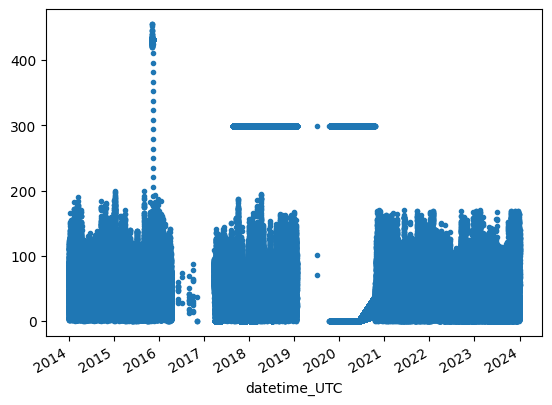

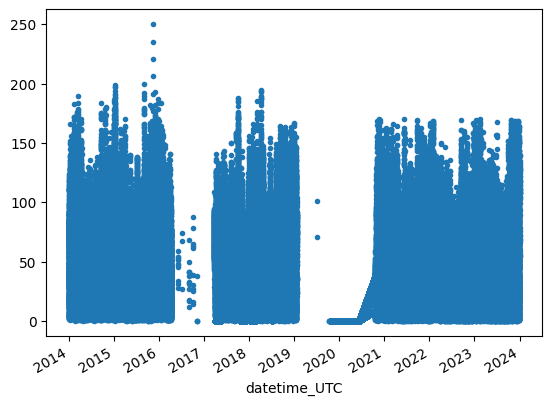

In [6]:
Flinten7["Current speed"].plot(style='.')
plt.show()
# The current speed in the years 2018-2021 look weird.... 
Flinten7.loc[Flinten7["Current speed"]>250,"Current speed"] = np.nan
Flinten7["Current speed"].plot(style='.')
plt.show()

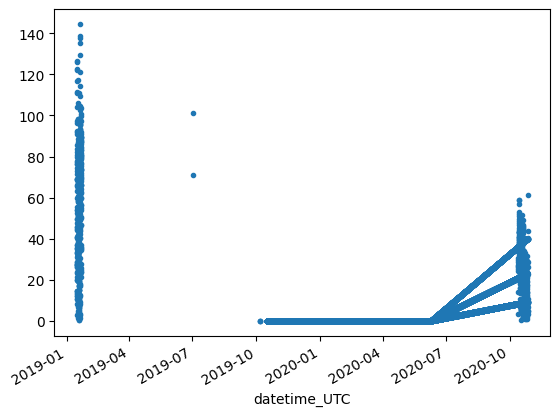

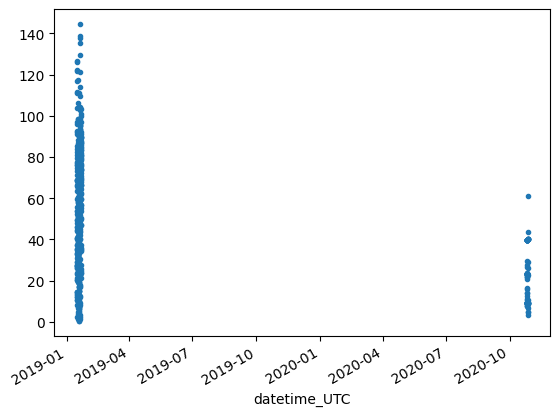

In [7]:
Flinten7.loc[(Flinten7.index >"2019-01-15") & (Flinten7.index <"2020-10-27"),"Current speed"].plot(style='.')
plt.show()
# This time period also looks weird
Flinten7.loc[(Flinten7.index >"2019-02-01") & (Flinten7.index <"2020-10-26"),"Current speed"] = np.nan
Flinten7.loc[(Flinten7.index >"2019-01-15") & (Flinten7.index <"2020-10-27"),"Current speed"].plot(style='.')
plt.show()

In [8]:
# Convert Current speed and directions to u and v components and calculate depth averaged velocities
Flinten7 = calculate_depth_averaged_velocities(Flinten7).dropna()
Flinten7


,Current direction,Measuring depth (m)_d,Current speed,Measuring depth (m)_s,u,v,u_depth_averaged,v_depth_averaged
datetime_UTC,,,,,,,,
2014-01-01 00:00:00,4.27,0,57.52,0.0,4.282743,57.360339,0.2133,0.4417
2014-01-01 00:00:00,32.56,2,47.79,2.0,25.719742,40.278766,0.2133,0.4417
2014-01-01 00:00:00,33.09,4,47.33,4.0,25.840085,39.653737,0.2133,0.4417
2014-01-01 00:00:00,36.80,6,49.19,6.0,29.465971,39.387976,0.2133,0.4417
2014-01-01 01:00:00,8.65,0,61.63,0.0,9.269037,60.928990,0.2589,0.5153
...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,39.02,6,78.19,6.0,49.227769,60.747863,-0.1345,1.1099
2023-12-31 23:00:00,338.64,0,114.71,0.0,-41.780444,106.830607,-0.1325,1.0429
2023-12-31 23:00:00,347.43,2,131.69,2.0,-28.659987,128.533502,-0.1325,1.0429


In [9]:
Flinten7.drop_duplicates(subset=["u_depth_averaged","v_depth_averaged"],inplace=True)
Flinten7

,Current direction,Measuring depth (m)_d,Current speed,Measuring depth (m)_s,u,v,u_depth_averaged,v_depth_averaged
datetime_UTC,,,,,,,,
2014-01-01 00:00:00,4.27,0,57.52,0.0,4.282743,57.360339,0.2133,0.4417
2014-01-01 01:00:00,8.65,0,61.63,0.0,9.269037,60.928990,0.2589,0.5153
2014-01-01 02:00:00,16.32,0,73.05,0.0,20.527176,70.106616,0.3604,0.6443
2014-01-01 03:00:00,15.66,0,80.25,0.0,21.661746,77.271154,0.4098,0.6894
2014-01-01 04:00:00,19.07,0,87.21,0.0,28.493520,82.423925,0.4340,0.7513
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,333.69,0,108.02,0.0,-47.877451,96.830109,-0.1344,0.9739
2023-12-31 20:00:00,332.72,0,117.80,0.0,-53.992374,104.697963,-0.1412,0.9988
2023-12-31 21:00:00,333.64,0,129.63,0.0,-57.556983,116.151326,-0.1751,1.0935


In [10]:
Flinten7[["u_depth_averaged","v_depth_averaged"]].rename(columns={"u_depth_averaged":"u","v_depth_averaged":"v"}).to_csv("../observations/Flinten7_u_v.csv", date_format='%Y-%m-%dT%H:%M:%S')

## Drogden and Helsingborg stations

In [11]:
dirs = ["smhi-opendata_2_3_35110_20241118_065837.csv","smhi-opendata_2_3_33101_20241118_065414.csv"]
stations = ["Helsingborg", "Drogden"]

for i,d in enumerate(dirs):
    data = pd.read_csv(f"raw_data/{d}",index_col=0,sep=";", parse_dates=True)
    data.rename(columns = swedish_to_english,inplace=True)
    data.index.names = ['datetime_UTC']

    # Filter data after time steps and quality flags.
    data = data.loc[(data.index >= "2014-01-01") & (data.index<"2024-01-01") & (data["Quality_d"] == "G") & (data["Quality_s"] == "G") ].drop(columns=["Quality_d","Quality_s","Unnamed: 7","Tidsutsnitt"])
    
    # Convert Current speed and directions to u and v components and calculate depth averaged velocities
    data = calculate_depth_averaged_velocities(data)
    data.drop_duplicates(subset=["u_depth_averaged","v_depth_averaged"],inplace=True)
    data[["u_depth_averaged","v_depth_averaged"]].rename(columns={"u_depth_averaged":"u","v_depth_averaged":"v"}).to_csv(f"../observations/{stations[i]}_u_v.csv", date_format='%Y-%m-%dT%H:%M:%S')
